In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import cohen_kappa_score, accuracy_score, adjusted_mutual_info_score, mean_absolute_error, r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import SelectKBest, chi2, f_classif,f_regression, SelectFromModel, RFE, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.linear_model import Lasso
from boruta import BorutaPy

import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns =100
pd.options.display.max_rows =100

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(3)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.34,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.17,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0


In [5]:
train = train.drop(columns=['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'], axis=1)

In [6]:
train = train.drop('id', axis=1)
test  = test.drop('id', axis=1)  

In [7]:
train['sii'] = train['sii'].fillna(train['sii'].mode()[0])  

In [8]:
X = train.drop(columns=['sii']).copy()
y = train['sii']

# PIPELINE

In [9]:
# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [10]:
# cat_cols = X.select_dtypes(include='object').columns
# cat_cols =[ 'CGAS-Season', 'Physical-Season',
#        'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
#        'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']
# 'Basic_Demos-Enroll_Season' - wykloczone z listy żeby zrobić na tej kolumnie vectorize

In [11]:
# vect = CountVectorizer()

In [10]:
# Numeric Columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
imp_knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating
# the distance between membersof the training dataset
# scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
# minmaxscaler = MinMaxScaler(feature_range=(1e-5,1)
power =  PowerTransformer()

In [11]:
# Categorical Columns
# imp_constant = SimpleImputer(strategy='most_frequent')
# imp_constant = SimpleImputer(strategy='constant', fill_value='missing')
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary')
# drop='if_binary' drops the first category of binary features (zamiast dwóch kolumn będzie jedna)

In [12]:
# do all preprocessing
preprocessor = make_column_transformer(
#                                         (vect, 'Basic_Demos-Enroll_Season'),
                                        (make_pipeline(imp_knn, minmaxscaler, power), num_cols),
                                        (make_pipeline(imp_constant, ohe), cat_cols)
                                      )

In [13]:
# (34) FEATURE SELECTION
# SelectPercentile default f_classify
selection1  = SelectPercentile(chi2, percentile=90)
selection2 = SelectKBest(chi2, k=50)
# ANOVA F-test in the f_classif() f_regression() function.
selection3 = SelectKBest(f_regression)
selection4 = SelectFromModel(Lasso(alpha=0.001))
selection5 = RFE(DecisionTreeRegressor(random_state=42), n_features_to_select=1)
# selection5 = RFE(RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42), n_features_to_select=10)
# selection6 = RFECV(estimator=RandomForestRegressor(), min_features_to_select=30)
selection6 = RFECV(estimator=RandomForestRegressor(random_state=42), step=1, cv=10, scoring='r2')
# min_features_to_select — The minimum number of features to be selected.

selection7  = SelectPercentile(mutual_info_regression, percentile=90)
selection8 = SelectKBest(mutual_info_classif, k=50)


selection9 = BorutaPy(RandomForestRegressor(max_depth = 5), n_estimators='auto', verbose=2, random_state=42)
selection10= BorutaPy(RandomForestRegressor(max_depth=5),n_estimators='auto', verbose=2, random_state=42, max_iter=50, perc=90)

In [14]:
# create a pipeline
pipe2 = make_pipeline(preprocessor,selection5, XGBRegressor(random_state=42))

In [16]:
pipe2.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002278A0DA3D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(st...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
# cross_val_score(pipe, X, y, cv=kf, scoring='r2').mean()

n_scores = cross_val_score(pipe2, X, y, cv=kf, scoring='neg_mean_absolute_error')
print('Accuracy: %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

Accuracy: -0.52 (0.01)


In [18]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipe2, X, y, cv=cv, scoring='r2', n_jobs=1)
print('Accuracy: %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.01 (0.03)


# (324) Transform the Target in Regression

PowerTransformer - data transforms on the target variable,that can make each variable more-Gaussian-like (using the Yeo-Johnson transform) and improve the performance of
linear models.
By default, the PowerTransformer also performs a standardization of each variable after performing the transform. It can also help to scale the values to the range 0-1 prior to applying a power transform, to avoid problems inverting the transform. We achieve this using the MinMaxScaler and defining a positive range (introduced in Chapter 17). The complete example of using a PowerTransformer on the input and target variables of the housing dataset is listed below.

TransformedTargetRegressor

In [38]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import HuberRegressor
# In this example, we will fitt a HuberRegressor class 
# (a type of linear regression robust to outliers) and normalize the input variables using a Pipeline.

In [40]:
pipe3 = make_pipeline(preprocessor,selection5, HuberRegressor())

In [41]:
pipe3.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F9FC5A3B90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F9FC59B4D0>)])),
                ('rfe',
                 RFE(estimator=DecisionTreeRegressor(random_state=42),
                     n_features_to_select=1)),
                ('huberregressor', HuberRegressor())])

In [44]:
# prepare the model with target scaling\
model = TransformedTargetRegressor(regressor=pipe3, transformer=PowerTransformer())

In [45]:
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.401


# (181) RFE - Explore Number of Features 

>50 -0.437 (0.018)
>51 -0.434 (0.012)


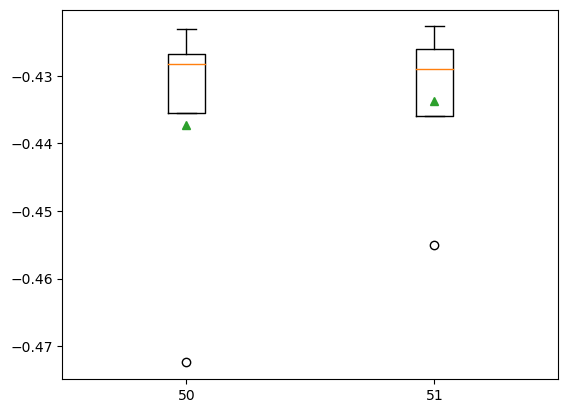

In [26]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(50, 52):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
    #     model = XGBRegressor()
    #     models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
        models[str(i)] = make_pipeline(preprocessor,rfe, XGBRegressor(random_state=42))
    return models
    # evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True,  random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    return scores
# define dataset
# X, y = get_dataset()
# # get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    # plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


# (151) GridSearchCV form ANOVA number of parameters

In [144]:
pipe3 = Pipeline(steps=[('prep',preprocessor), ('anova',selection3), ('xgb', XGBRegressor(random_state=42))])

In [145]:
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]

In [146]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [147]:
search = GridSearchCV(pipe3, grid, scoring='r2', cv=cv)
# perform the search
results = search.fit(X, y)

KeyboardInterrupt: 

In [ ]:
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

In [143]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
n_scores = cross_val_score(pipe3, X, y, cv=kf, scoring='r2')
print('Accuracy: %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.17 (0.05)


# (169) Tune the Number of Selected Features

In [ ]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
print('>%.3f with: %r' % (mean, param))

We might want to see the relationship between the number of selected features and MAE.
In this relationship, we may expect that more features result in better performance, to a
point. This relationship can be explored by manually evaluating each conguration of k for
the SelectKBest

In [ ]:
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
# create pipeline
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression, k=k)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
results.append(scores)
# summarize the results
print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

# (186) RFECV

In [ ]:
# pipe.fit(X, y)
print('Optimal number of features: %d' % selection6.n_features_)

In [ ]:
selection66 = pd.concat([pd.DataFrame(X.columns, columns=['feat']),
                    pd.DataFrame(selection6.ranking_, columns=['rank'])
                   ], axis=1).sort_values(by='rank')
 
selection66

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# (198) CART(Classification And Regression Tree) Feature Importance

# (213) How to Scale Numerical Data

1. The Scale of Your Data Matters
2. Numerical Data Scaling Methods
3. Diabetes Dataset
4. MinMaxScaler Transform
5. StandardScaler Transform

# (230) Scale Data With Outliers (RobustScaler)

1. Scaling Data
2. Robust Scaler Transforms
3. Diabetes Dataset
4. IQR Robust Scaler Transform
5. Explore Robust Scaler Range

# (241) Encode Categorical Data

1. Nominal and Ordinal Variables
2. Encoding Categorical Data
3. OrdinalEncoder Transform
4. OneHotEncoder Transform

# (255) Make Distributions More Gaussian

1. Make Data More Gaussian
2. Power Transforms
3. Sonar Dataset
4. Box-Cox Transform
5. Yeo-Johnson Transform

# (271) Change Numerical Data Distributions

1. Change Data Distribution
2. Quantile Transforms
3. Sonar Dataset
4. Normal Quantile Transform
5. Uniform Quantile Transform

# (286) Transform Numerical to Categorical Data

1. Change Data Distribution
2. Discretization Transforms
3. Sonar Dataset
4. Uniform Discretization Transform
5. k-Means Discretization Transform
6. Quantile Discretization Transform

# (304) How to Derive New Input Variables

1. Polynomial Features
2. Polynomial Feature Transform
3. Sonar Dataset
4. Polynomial Feature Transform Example
5. Effect of Polynomial Degree

# (338) Dimensionality Reduction

1. Problem With Many Input Variables
2. Dimensionality Reduction
3. Techniques for Dimensionality Reduction

(93)
The key hyperparameter for the KNN algorithm is k; that controls the number of nearest
neighbors that are used to contribute to a prediction. It is good practice to test a suite of
diferent values for k. [1,3,5,7,9,15,18,21] 

In [32]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3]]
for s in strategies:
    pipe2 = make_pipeline(KNNImputer(n_neighbors=int(s), XGBRegressor(random_state=42))
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipe2, X, y, scoring='r2', cv=cv, n_jobs=-1).mean()

    # store results
    results.append(scores)
    print(f'{scores}')
#     print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

0.18812011247780766
0.18812011247780766


In [33]:
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

NameError: name 'pyplot' is not defined

# VotingRegressor (46)

In [423]:
model_1 = LinearRegression()
model_2 = XGBRegressor(random_state=42)

In [424]:
voting_regressor = VotingRegressor(estimators=[
    ('logistic_regression', model_1),
    ('xgb_boosting', model_2)
])

In [401]:
# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile=90)

In [425]:
pipe_2 = make_pipeline(preprocessor, selection, voting_regressor)

In [426]:
pipe_2.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=True, n_jobs=None,
                                   remainder='drop', sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max...
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           objective='reg:squarederror', ...))],
                                 n_jobs=None, verbose=False, weights=None))],
         verbose=False)

In [429]:
kf = KFold(5, shuffle=True, random_state=42)
cross_val_score(pipe_2, X, y, cv=kf, scoring='r2').mean()

-2.4582407124005555e+17

In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
# Train the model
pipe_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=True, n_jobs=None,
                                   remainder='drop', sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max...
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           objective='reg:squarederror', ...))],
                                 n_jobs=None, verbose=False, weights=None))],
         verbose=False)

In [440]:
# Make predictions
y_pred = pipe_2.predict(X_test)

# Evaluating the Models

In [444]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_indices = y_true != 0
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.4075567691178723
Mean Squared Error: 0.34372838254313837
Root Mean Squared Error: 0.586283534258927
R^2 Score: 0.3045606900334831
Mean Absolute Percentage Error: 45.66134282941602


In [ ]:
# ColumnTransformer outputs 7 columns (38)
preprocessor.fit_transform(X).shape

In [ ]:
# get the names of those 7 features (38)
preprocessor.get_feature_names_out

In [353]:
# see all parameters  (40)
preprocessor.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('countvectorizer',
   CountVectorizer(),
   'Basic_Demos-Enroll_Season'),
  ('pipeline-1',
   Pipeline(steps=[('simpleimputer',
                    SimpleImputer(add_indicator=True, strategy='median')),
                   ('minmaxscaler', MinMaxScaler())]),
   <sklearn.compose._column_transformer.make_column_selector at 0x28c64c6e750>),
  ('pipeline-2',
   Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                   ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
   ['CGAS-Season',
    'Physical-Season',
    'Fitness_Endurance-Season',
    'FGC-Season',
    'BIA-Season',
    'PAQ_A-Season',
    'PAQ_C-Season',
    'SDS-Season',
    'PreInt_EduHx-Season'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'countvectorizer': CountVectorizer(),
 'pipeline-1': Pipeline(steps=[('simpleimputer',


In [354]:
# restore the previous behavior (40)
from sklearn import set_config
set_config(print_changed_only=False)
preprocessor

ColumnTransformer(force_int_remainder_cols=True, n_jobs=None, remainder='drop',
                  sparse_threshold=0.3, transformer_weights=None,
                  transformers=[('countvectorizer',
                                 CountVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.int64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                                 max_features=None, min_df=1,
                                                 ngram_range=(1...
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_output=True))],
                                          verbose=False),
                                 ['CGAS-Season', 'Physical-Season',
                                  'Fitness_Endurance-Season', 'FGC-Season',
                                  'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season',
                                  'SDS-Season', 'PreInt_EduHx-Season'])],
                  verbose=False, verbose_feature_names_out=True)

Inny zapis

In [242]:
ohe = OneHotEncoder()
vect = CountVectorizer()
imputer= SimpleImputer()
preprocessor = make_column_transformer(
                                        (ohe, ['Basic_Demos-Enroll_Season']), 
                                        (vect, 'CGAS-Season'),
                                        (imputer, ['Basic_Demos-Age'])
                                      )

In [238]:
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Basic_Demos-Enroll_Season']),
     ('vectorizer', CountVectorizer(), 'CGAS-Season'),
     ('imputer', SimpleImputer(), ['Basic_Demos-Age'])])

In [239]:
clf1 = LogisticRegression(solver='liblinear', random_state=1)

In [240]:
pipe = Pipeline([('preprocessor', ct), ('classifier', clf1)])

In [241]:
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Basic_Demos-Enroll_Season']),
                                                 ('vectorizer',
                                                  CountVectorizer(),
                                                  'CGAS-Season'),
                                                 ('imputer', SimpleImputer(),
                                                  ['Basic_Demos-Age'])])),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

# Pipeline with feature selection (34)

In [335]:
from sklearn.feature_selection import SelectPercentile, chi2

In [336]:
# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile=50)

In [363]:
pipe = make_pipeline(preprocessor, selection, LogisticRegression(), verbose=True)

In [364]:
# verbose=True pokazuje czas wykonania poszczególnych kroków
pipe.fit(X, y)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.0s
[Pipeline] .. (step 2 of 3) Processing selectpercentile, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.1s


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=True, n_jobs=None,
                                   remainder='drop', sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max...
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x0000028C638A1B20>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='deprecated', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=True)

In [339]:
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.7194444444444444

# Display estimators as diagram (37)

In [341]:
from sklearn import set_config
set_config(display='diagram')

In [342]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('countvectorizer',
                                                  CountVectorizer(),
                                                  'Basic_Demos-Enroll_Season'),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028C64C6E7...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CGAS-Season',
                                                   'Physical-Season',
                                                   'Fitness_Endurance-Season',
                                                   'FGC-Season', 'BIA-Season',
                                                   'PAQ_A-Season',
                                                   'PAQ_C-Season', 'SDS-Season',
                                                   'PreInt_EduHx-Season'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x0000028C638A1B20>)),
                ('logisticregression', LogisticRegression())])

# Cross-validate the entire pipeline (not just the model)

'normalized_mutual_info_score', 'roc_auc_ovr', 'f1_samples', 'jaccard_weighted', 'roc_auc_ovo', 'recall_micro', 'neg_mean_squared_log_error', 'precision_samples', 'recall_samples', 'neg_mean_gamma_deviance', 'top_k_accuracy', 'neg_mean_poisson_deviance', 'homogeneity_score', 'precision', 'rand_score', 'roc_auc_ovo_weighted', 'recall_macro', 'recall_weighted', 'precision_micro', 'neg_root_mean_squared_log_error', 'balanced_accuracy', 'precision_weighted', 'recall', 'f1_weighted', 'jaccard_micro', 'v_measure_score', 'neg_mean_absolute_percentage_error', 'jaccard_samples', 'neg_mean_squared_error', 'fowlkes_mallows_score', 'neg_brier_score', 'roc_auc', 'r2', 'f1', 'precision_macro', 'mutual_info_score', 'neg_median_absolute_error', 'completeness_score', 'neg_mean_absolute_error', 'neg_log_loss', 'explained_variance', 'jaccard', 'max_error', 'matthews_corrcoef', 'accuracy', 'f1_micro', 'jaccard_macro', 'adjusted_rand_score', 'f1_macro', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'roc_auc_ovr_weighted', 'positive_likelihood_ratio', 'adjusted_mutual_info_score', 'average_precision', 'd2_absolute_error_score'

In [293]:
# cross-validate the pipeline
cross_val_score(pipe, X, y, cv=5, scoring='f1_micro').mean()

0.7164141414141414

# Use KFold with regression problems:

In [277]:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(pipe, X, y, cv=kf, scoring='accuracy').mean()

0.717929292929293

# Use StratifiedKFold with classification problems:

In [278]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)
cross_val_score(pipe, X, y, cv=skf, scoring='accuracy').mean()

0.7176767676767677

# Multiclass AUC with train/test split

AUC is an excellent evaluation metric for binary classification, especially if you have class imbalance.

In [299]:
from sklearn.metrics import roc_auc_score

In [300]:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(pipe, X, y, cv=kf, scoring='roc_auc_ovo').mean()

0.7093730618811017

In [302]:
# use 'ovo' (One-vs-One) or 'ovr' (One-vs-Rest)
cross_val_score(pipe, X, y, cv=5, scoring='roc_auc_ovo').mean()

0.7151068323103933

# Find optimal tuning parameters for the entire pipeline

In [62]:
# specify parameter values to search
params = {}
# params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

# GridSearchCV

In [ ]:
# Want your grid search to run faster? Set n_jobs=-1 to use parallel processing with all CPUs! (44)

In [63]:
# try all possible combinations of those parameter values
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, y);

In [64]:
# what was the best score found during the search?
grid.best_score_

0.615909090909091

In [65]:
# which combination of parameters produced the best score?
grid.best_params_

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

In [66]:
# convert results into a DataFrame
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [67]:
# sort by test score
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'logisticregression__C': 0.1, 'logisticregres...",0.615909,1
5,"{'logisticregression__C': 10, 'logisticregress...",0.611111,2
3,"{'logisticregression__C': 1, 'logisticregressi...",0.609091,3
0,"{'logisticregression__C': 0.1, 'logisticregres...",NaN,4
2,"{'logisticregression__C': 1, 'logisticregressi...",NaN,4
4,"{'logisticregression__C': 10, 'logisticregress...",NaN,4


In [ ]:
# fit the pipeline and make predictions
pipe.fit(X, y)
pipe.predict(test)

In [ ]:
# save the pipeline to a file
import joblib
joblib.dump(pipe, 'pipe.joblib')

In [ ]:
# load the pipeline from a file
same_pipe = joblib.load('pipe.joblib')

In [ ]:
# use it to make the same predictions
same_pipe.predict(test)